In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Data/SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [5]:
#drop these features
RIP = ["genre","artist_name","track_name",
       "track_id","duration_ms","time_signature",
       "popularity","loudness","key","mode","tempo"]

In [6]:
songs = df.drop(columns=RIP)
songs.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.611,0.389,0.910,0.000,0.3460,0.0525,0.814
1,0.246,0.590,0.737,0.000,0.1510,0.0868,0.816
2,0.952,0.663,0.131,0.000,0.1030,0.0362,0.368
3,0.703,0.240,0.326,0.000,0.0985,0.0395,0.227
4,0.950,0.331,0.225,0.123,0.2020,0.0456,0.390


In [7]:
features = songs.columns
features

Index(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'speechiness', 'valence'],
      dtype='object')

In [8]:
ID = songs.iloc[[65621,192477]].to_numpy()
ID

array([[1.23e-01, 5.63e-01, 8.04e-01, 4.82e-04, 1.34e-01, 8.05e-02,
        5.25e-01],
       [1.07e-01, 5.23e-01, 8.03e-01, 4.09e-04, 1.54e-01, 7.91e-02,
        9.21e-01]])

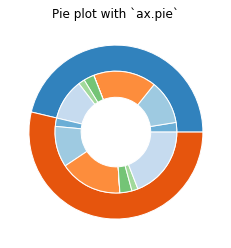

In [9]:
fig, ax = plt.subplots()

size = .3
vals = ID

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10,3]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [10]:
Attributes = list(songs)
AttNo = len(Attributes)

In [11]:
Attributes

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'speechiness',
 'valence']

In [12]:
AttNo

7

In [13]:
values = songs.iloc[65621].tolist()
values

[0.12300000000000001, 0.563, 0.804, 0.000482, 0.134, 0.0805, 0.525]

In [14]:
values += values [:1]
values

[0.12300000000000001,
 0.563,
 0.804,
 0.000482,
 0.134,
 0.0805,
 0.525,
 0.12300000000000001]

In [15]:
from math import pi

In [16]:
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

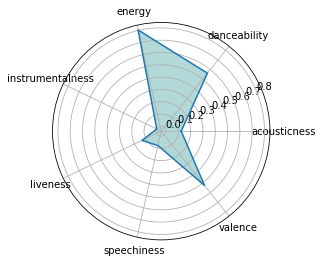

In [17]:
ax = plt.subplot(111, polar=True)
#Add the attribute labels to our axes
plt.xticks(angles[:-1],Attributes)

#Plot the line around the outside of the filled area, using the angles and values calculated before
ax.plot(angles, values)

#Fill in the area plotted in the last line
ax.fill(angles, values,  'teal', alpha=0.3)

#Give the plot a title and show it
#ax.set_title("song")
plt.show()

In [18]:
print(df["track_name"].loc[65621],"by", df["artist_name"].loc[65621])

Heartland by Tom Walker


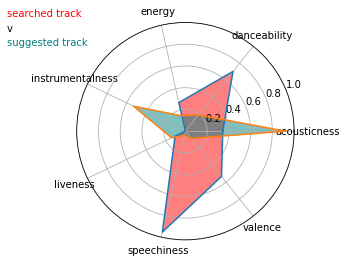

In [19]:
# dual display

#searched song

#insert values for song 1 aka searched song
values = songs.iloc[6].tolist()
values += values [:1]

#insert values for song 2 aka prediction
values2 = songs.iloc[10].tolist()
values2 += values2 [:1]

#calulate spacing angle for features for both songs
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles[:1]
angles2 += angles2[:1]

#Create the chart as before, but with both tracks angles/values
ax = plt.subplot(111, polar=True)

# Set color and linestyle of grid

plt.xticks(angles[:-1],Attributes)

ax.plot(angles,values)
ax.fill(angles, values, 'red', alpha=.5)

ax.plot(angles2,values2)
ax.fill(angles2, values2, 'teal', alpha=.5)

#Rather than use a title, individual text points are added
plt.figtext(0.1,0.9,"searched track",color="red")
plt.figtext(0.1,0.85,"v")
plt.figtext(0.1,0.8,"suggested track",color="teal")
plt.show()

NameError: name 'intervals' is not defined

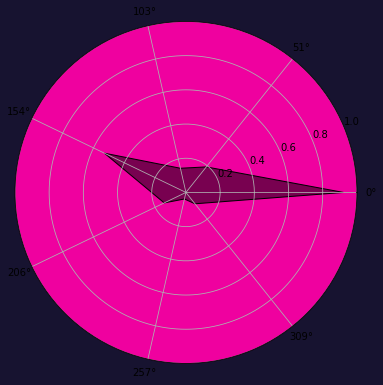

In [20]:

key_notation = {0: 'C', 1: 'C-sharp', 2: 'D', 3: 'D-sharp',
                4: 'E', 5: 'F', 6: 'F-sharp', 7: 'G', 8: 'G-sharp',
                9: 'A', 10: 'B-flat', 11: 'B'}
mode_notation = {0: 'Minor', 1: 'Major'}

fig = plt.figure(facecolor='#171330', figsize=(5,5))
ax = plt.axes([0.025, 0.025, 0.95, 0.95], polar=True, facecolor='#EF019F')

data = songs.iloc[10]

N = 7
theta = np.arange(0.0, 2 * np.pi, 2 * np.pi / N)
radii = data
p = []
for i in range(7):
    p.append((theta[i], radii[i]))
poly = plt.Polygon(p, ec="k", color='#780150')
ax.add_patch(poly)

ax.set_xticks(theta)
ax.set_xticklabels(['tempo', 'loudness'] + intervals.columns.tolist(), rotation=45, color='white', fontweight='bold')
ax.set_yticklabels([])
ax.grid(b=False, axis='y')
ax.grid(axis='x', color='#171330')

key = key_notation[df.loc[10, 'key']]
mode = mode_notation[df.loc[10, 'mode']]
time_sig = int(df.time_signature[0])
minutes = np.round(df.duration_ms[0] / 36000, 2)
duration = str(minutes)[:-3] + ':' + str(minutes)[-2:]

textstr = f"Pitch: {key} {mode};  Time Signature: {time_sig} / 4;  Duration: {duration} minutes"

props = dict(boxstyle='round', facecolor='#780150', alpha=1)

# place a text box in upper left in axes coords
ax.text(40.05, 1.75, textstr, fontsize=14,
        verticalalignment='top', bbox=props, color='white')

plt.show()

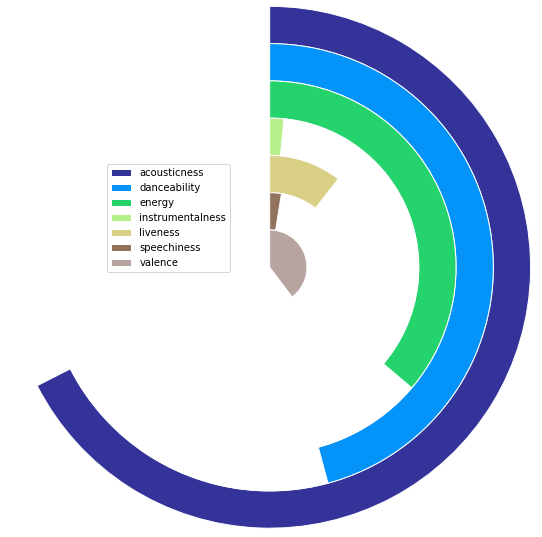

In [21]:
from matplotlib import cm
from math import log10

labels = songs.columns
data = songs.iloc[65675]

#number of data points
n = len(data)

#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 3
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

#plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.legend(loc=0)
plt.show()

In [22]:
ten = songs[:100]
ten = ten.to_numpy()


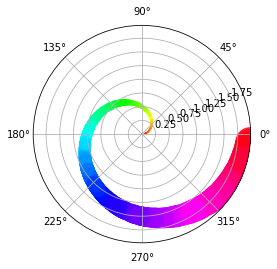

In [23]:
from pylab import *

N = ten
r = 2*N
theta = 2*pi*N
area = 200*r**2*N
colors = theta
ax = subplot(111, polar=True)
c = scatter(theta, r, c=colors, s=area, cmap=cm.hsv)
c.set_alpha(0.75)

show()

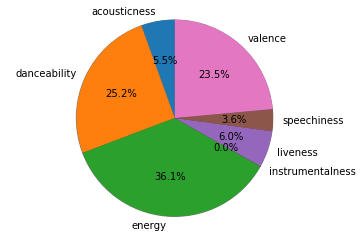

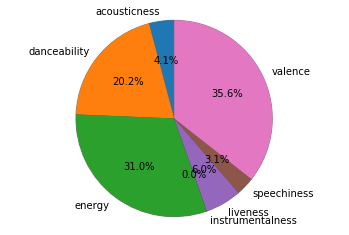

<Figure size 720x720 with 0 Axes>

In [24]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Attributes
sizes1 = ID[0]
sizes2 = ID[1]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=10)
fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=30)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.figure(figsize=(10,10))
plt.show()

(-1.1430355096161773,
 1.1641126708368215,
 -1.1585116469933763,
 1.1547258175502897)

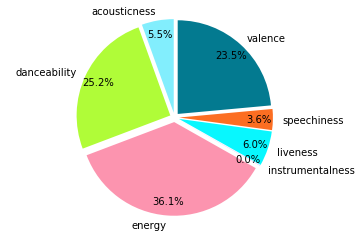

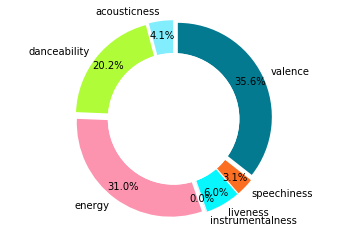

In [53]:
# Pie chart
labels = Attributes
sizes1 = ID[0]
sizes2 = ID[1]
#colors
colors1 = ['#0A1172','#66b3ff','#FF1694','#560A86','#09FBD3','#F5D300','#FDD400']
colors2 = ['#82EEFD','#B0FC38','#FC94AF','#7122FA','#08F7FE','#FC6E22','#037A90']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, colors = colors2, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
fig, ax = plt.subplots()
ax.pie(sizes2, colors = colors2, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle1 = plt.Circle((0,0),0.70,fc='WHITE')
centre_circle = plt.Circle((0,0),0.70,fc='WHITE')


fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

fig = plt.gcf()
fig.gca().add_artist(centre_circle1)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

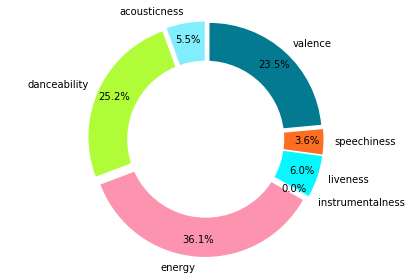

In [47]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Attributes
sizes1 = ID[0]
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes1, colors = colors2, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='WHITE')

fig1 = plt.gcf()
fig1.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

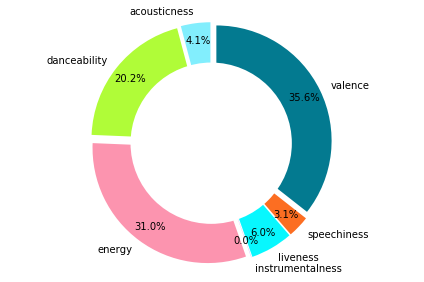

In [46]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Attributes
sizes2 = ID[1]
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)

fig, ax = plt.subplots()
ax.pie(sizes2, colors = colors2, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='WHITE')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.show()